In [1]:
import os
os.chdir('..')

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [3]:
RESULTS_DIR = "results/jester_evaluation_v3"

In [4]:
p = Path(RESULTS_DIR)

In [5]:
pickle_paths = p.glob("./*.pickle")

In [6]:
pickle_paths

<generator object Path.glob at 0x117580f90>

## Extract the data

In [7]:
reward_dict = {}
ndcg_dict = {}
time_dict = {}
for i, p in enumerate(pickle_paths):
    with open(p, "rb") as f:
        d = pickle.load(f)
    stats_dict = d[0][0]
    one_rew_dict = d[1]
    one_ndcg_dict = d[2]
    for key in one_rew_dict:
        rew_list = one_rew_dict[key]
        ndcg_list = one_ndcg_dict[key]
        mean_rew = np.mean(np.stack(rew_list), axis=0)
        mean_ndcg = np.mean(np.stack(ndcg_list), axis=0)
        reward_dict[key] = mean_rew
        ndcg_dict[key] = mean_ndcg
        assert key == stats_dict[0]
        time_dict[key] = stats_dict[1]['Time mean']

In [8]:
list(reward_dict.keys())

['CBRAP (d=150, alpha=0.3)',
 'D-LinTS-RP (d=150, gamma=0.99, a=0.1)',
 'RandomPolicy',
 'LinearTS (nu=0.3)',
 'CBRAP (d=300, alpha=0.3)',
 'CBRAP (d=30, alpha=0.3)',
 'D-LinTS-RP (d=30, gamma=0.99, a=0.1)',
 'E-Greedy (epsilon=0.05)',
 'DLinTS (gamma=0.99, a=0.1)',
 'D-LinTS-RP (d=60, gamma=0.99, a=0.1)',
 'CBRAP (d=15, alpha=0.3)',
 'D-LinTS-RP (d=15, gamma=0.99, a=0.1)',
 'LinUCB (alpha=0.3)',
 'DeepFM',
 'D-LinTS-RP (d=300, gamma=0.99, a=0.1)',
 'CBRAP (d=60, alpha=0.3)']

## Rename the policies

In [9]:
new_reward_dict = {
#     'D-LinTS-RP (d=300)': reward_dict['D-LinTS-RP (d=300, gamma=0.99, a=0.1)'],
#     'CBRAP (d=30)': reward_dict['CBRAP (d=30, alpha=0.3)'],
    r'$\epsilon$-Greedy':  reward_dict['E-Greedy (epsilon=0.05)'],
    'DeepFM': reward_dict['DeepFM'],
    'D-LinTS-RP (d=60)': reward_dict['D-LinTS-RP (d=60, gamma=0.99, a=0.1)'],
    'CBRAP (d=150)': reward_dict['CBRAP (d=150, alpha=0.3)'],
    'LinTS': reward_dict['LinearTS (nu=0.3)'],
#     'CBRAP (d=300)': reward_dict['CBRAP (d=300, alpha=0.3)'],
#     'D-LinTS-RP (d=15)': reward_dict['D-LinTS-RP (d=15, gamma=0.99, a=0.1)'],
#     'LinUCB': reward_dict['LinUCB (alpha=0.3)'],
    'CBRAP (d=60)': reward_dict['CBRAP (d=60, alpha=0.3)'],
#     'D-LinTS-RP (d=30)': reward_dict['D-LinTS-RP (d=30, gamma=0.99, a=0.1)'],
    'Random': reward_dict['RandomPolicy'],
    'D-LinTS': reward_dict['DLinTS (gamma=0.99, a=0.1)'],
#     'CBRAP (d=15)': reward_dict['CBRAP (d=15, alpha=0.3)'],
    'D-LinTS-RP (d=150)': reward_dict['D-LinTS-RP (d=150, gamma=0.99, a=0.1)'],
}

In [10]:
reward_dict = new_reward_dict

In [11]:
new_ndcg_dict = {
#     'D-LinTS-RP (d=300)': ndcg_dict['D-LinTS-RP (d=300, gamma=0.99, a=0.1)'],
#     'CBRAP (d=30)': ndcg_dict['CBRAP (d=30, alpha=0.3)'],
    r'$\epsilon$-Greedy':  ndcg_dict['E-Greedy (epsilon=0.05)'],
    'DeepFM': ndcg_dict['DeepFM'],
    'D-LinTS-RP (d=60)': ndcg_dict['D-LinTS-RP (d=60, gamma=0.99, a=0.1)'],
    'CBRAP (d=150)': ndcg_dict['CBRAP (d=150, alpha=0.3)'],
    'LinTS': ndcg_dict['LinearTS (nu=0.3)'],
#     'CBRAP (d=300)': ndcg_dict['CBRAP (d=300, alpha=0.3)'],
#     'D-LinTS-RP (d=15)': ndcg_dict['D-LinTS-RP (d=15, gamma=0.99, a=0.1)'],
#     'LinUCB': ndcg_dict['LinUCB (alpha=0.3)'],
    'CBRAP (d=60)': ndcg_dict['CBRAP (d=60, alpha=0.3)'],
#     'D-LinTS-RP (d=30)': ndcg_dict['D-LinTS-RP (d=30, gamma=0.99, a=0.1)'],
    'Random': ndcg_dict['RandomPolicy'],
    'D-LinTS': ndcg_dict['DLinTS (gamma=0.99, a=0.1)'],
#     'CBRAP (d=15)': ndcg_dict['CBRAP (d=15, alpha=0.3)'],
    'D-LinTS-RP (d=150)': ndcg_dict['D-LinTS-RP (d=150, gamma=0.99, a=0.1)'],
}

In [12]:
ndcg_dict = new_ndcg_dict

In [13]:
CHANGE_POINTS = [1, 5000, 10000, 20000, 35000, 50000, 65000, 80000, 90000, 100000]

## Plot the results

In [25]:
from matplotlib.ticker import StrMethodFormatter
def plot_ctrs_and_ndcg_together(reward_dict, ndcg_dict, change_points):    
    fig, ax = plt.subplots(1, 2, figsize=(26,8), facecolor='white');
    N = 0
    sorted_reward_list = sorted([(l,r) for l, r in reward_dict.items()], key=lambda x: x[1][-1], reverse=True)
    
    ind_to_params = {
        # ind: (mark, color)
        0: ('o', 'tab:blue'),
        1: ('v','tab:orange'),
        2: ('s','tab:green'),
        3: ('^','tab:red'),
        4: ('d','tab:purple'),
        5: ('x', 'tab:brown'),
        6: ('s', 'tab:pink'),
        7: ('x', 'tab:grey'),
        8: ('*', 'tab:olive'),
        9: ('h', 'tab:blue'),
        10: ('P','tab:orange'),
        11: ('p','tab:green'),
        12: ('8','tab:red'),
        13: ('<','tab:purple'),
        14: ('X', 'tab:brown'),
        15: ('v', 'xkcd:azure'),
    }
    
    # Find out largest value. Do this first so change points appear first in the legend.
    max_vline_0 = 0
    max_vline_1 = 0
    for ind, (label, reward) in enumerate(sorted_reward_list):
        mark, color = ind_to_params[ind]
        
        ndcg = ndcg_dict[label]
        times = (range(1, len(reward)+1))
        cumulative_reward_over_time = [r/t for r,t in zip(reward, times)]
        cumulative_ndcg_over_time = [r/t for r,t in zip(ndcg, times)]
        max_vline_0=max(max_vline_0, max(cumulative_reward_over_time[N:]))
        max_vline_1=max(max_vline_1, max(cumulative_ndcg_over_time[N:]))
            
            
        plot_kwargs = {
            'label': label, 'marker':mark, 'markevery': 7000, 'markersize':14, 'markeredgewidth': 4.0,
            'fillstyle':'none', 'color': color, 'linewidth': 3.8
        }
        ax[0].plot(
            cumulative_reward_over_time[N:], **plot_kwargs,
        )
        ax[1].plot(
            cumulative_ndcg_over_time[N:], **plot_kwargs,
        )
    max_vline_0 *= 1.06
    max_vline_1 *= 1.06
        
    reward_change_points = change_points[1:-1]
    ax[0].vlines(
        reward_change_points, ymin=0, ymax=max_vline_0 + 0.1, alpha=0.65
    )   
    ax[1].vlines(
        reward_change_points, ymin=0, ymax=max_vline_1 + 0.1, alpha=0.65
    ) 
     
    for axis in [ax[0], ax[1]]:
        extraticks = change_points
        axis.set_xticks(extraticks)
#         axis.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
        axis.tick_params(axis='x', labelsize=24)
        axis.tick_params(axis='y', labelsize=24)
        axis.set_xlabel('Time', fontsize=30)
        
        axis.ticklabel_format(style='sci', axis='x', scilimits=(3,3), useMathText=True)
        axis.xaxis.offsetText.set_fontsize(24)

    ax[0].set_ylabel('Click-Through Rate', fontsize=33)
    ax[0].set_ylim(-0.002, max_vline_0)
    ax[0].set_xlim(-500, 100500)
    
    ax[1].set_ylabel('Cumulative NDCG@5', fontsize=33)
    ax[1].set_ylim(-0.002, max_vline_1)
    ax[1].set_xlim(-500, 100500)

    
    handles, labels = ax[1].get_legend_handles_labels()
    fig.legend(handles, labels, prop={'size': 24.5},
               ncol=5, loc='upper center', bbox_to_anchor=(0.521, 1.144), columnspacing=0.99,
              )
    
    
    plt.tight_layout();
    plt.savefig(
        f'plotting/jester_results_both',
        dpi=300, facecolor=fig.get_facecolor(), bbox_inches='tight'
    );
    plt.show();

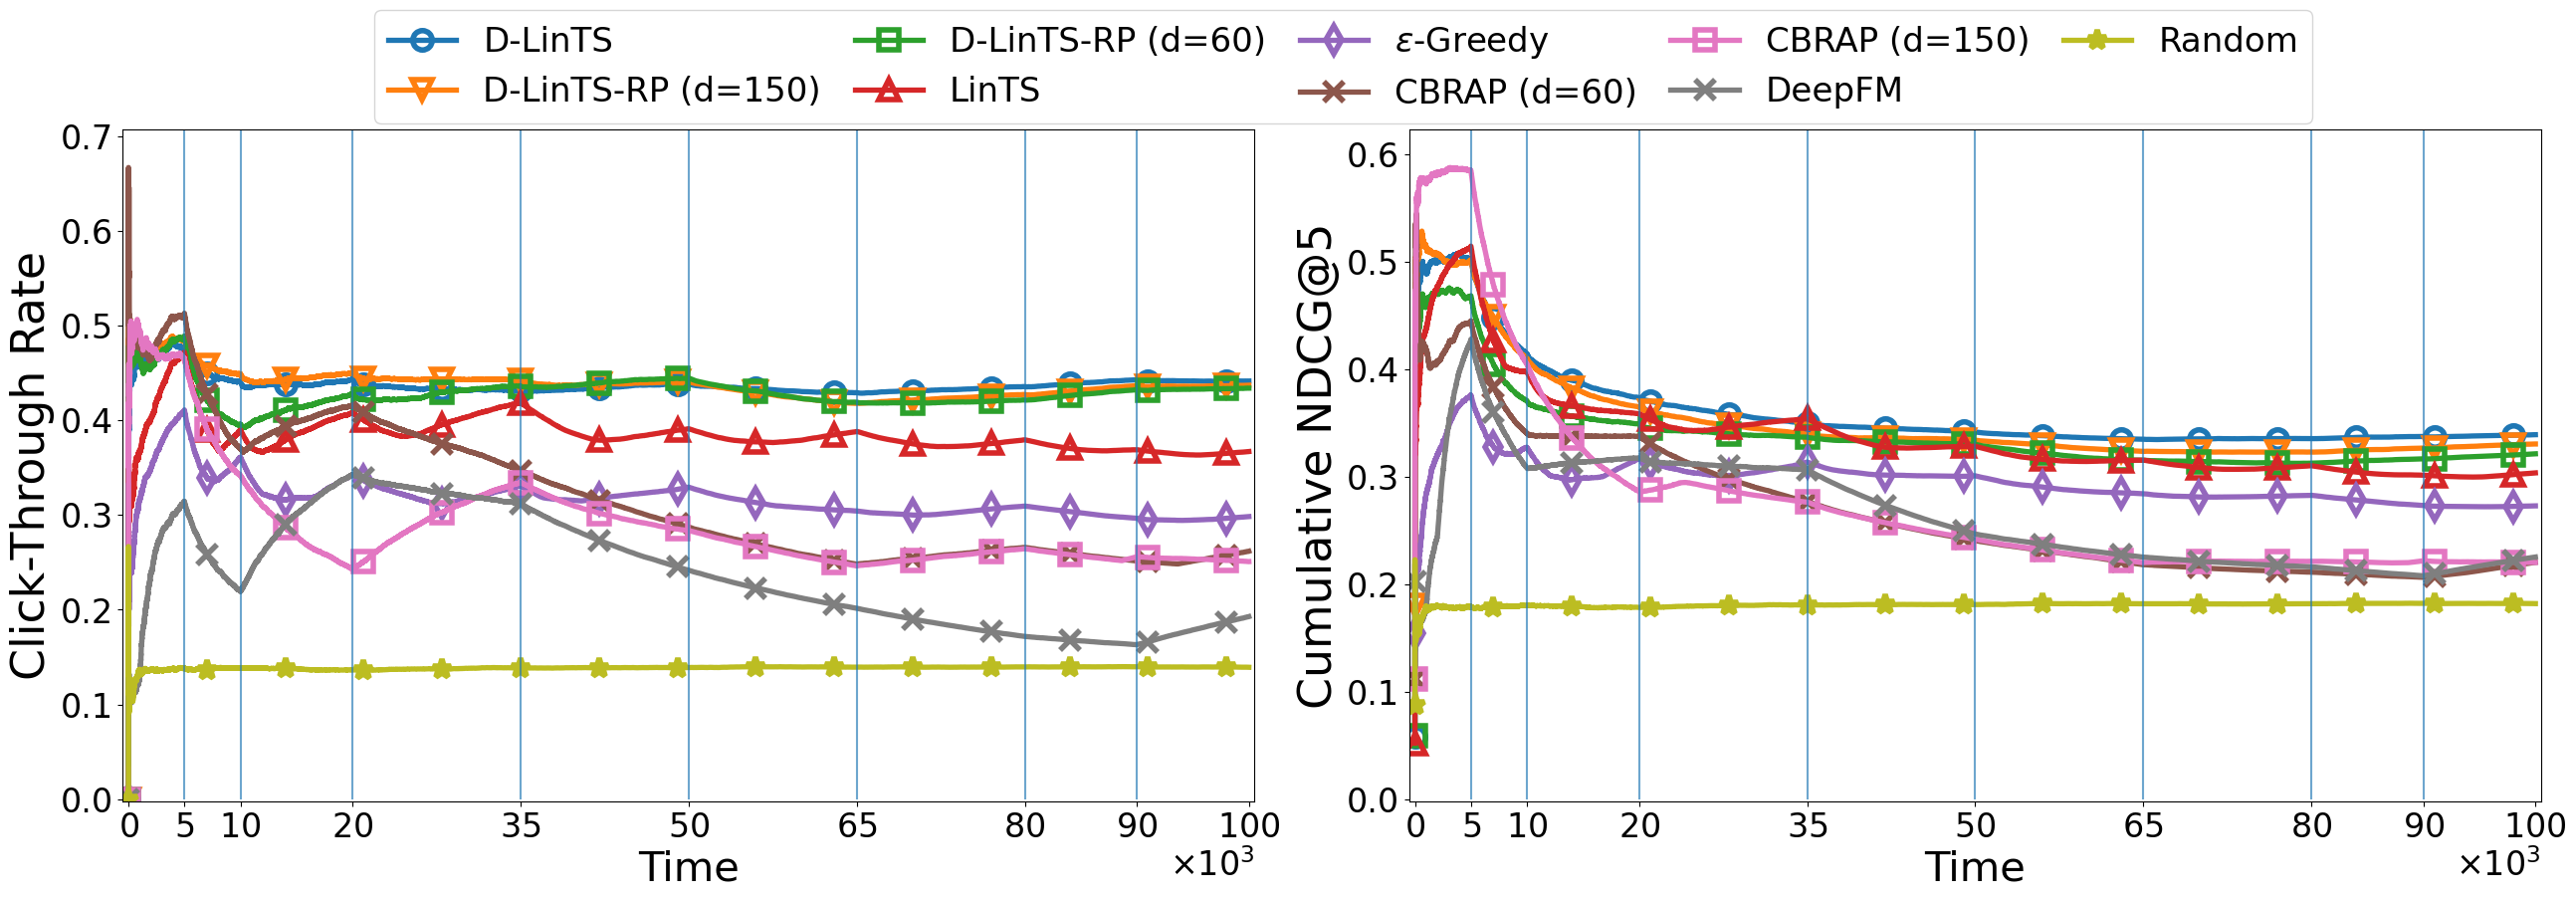

In [26]:
plot_ctrs_and_ndcg_together(reward_dict, ndcg_dict, CHANGE_POINTS)

In [27]:
def plot_ctrs_or_rewards(reward_dict, plot_type, change_points):
    if plot_type not in {'CTR', 'Cumulative reward', 'NDCG'}:
        raise ValueError("plot_type should be CTR or Cumulative reward or NDCG")
        
    fig, ax = plt.subplots(1,1, figsize=(14,9));
    N = 10
    sorted_reward_list = sorted(
        [
            (l,r) for l, r in reward_dict.items()
        ],
        key=lambda x: x[1][-1],
        reverse=True,
    )
    
    ind_to_params = {
        # ind: (mark, color)
        0: ('o', 'tab:blue'),
        1: ('v','tab:orange'),
        2: ('^','tab:green'),
        3: ('<','tab:red'),
        4: ('d','tab:purple'),
        5: ('>', 'tab:brown'),
        6: ('s', 'tab:pink'),
        7: ('x', 'tab:grey'),
        8: ('*', 'tab:olive'),
        9: ('p', 'tab:blue'),
        10: ('P','tab:orange'),
        11: ('h','tab:green'),
        12: ('8','tab:red'),
        13: ('<','tab:purple'),
        14: ('X', 'tab:brown'),
        15: ('v', 'xkcd:azure'),
    }
    
    # Find out largest value. Do this first so change points appear first in the legend.
    max_vline = 0
    for ind, (label, reward) in enumerate(sorted_reward_list):
        times = (range(1, len(reward)+1))
        
        mark, color = ind_to_params[ind]
        cumulative = [r for r,t in zip(reward, times)]
        cumulative_over_time = [r/t for r,t in zip(reward, times)]
        if plot_type in {'CTR', 'NDCG'}:
            to_plot = cumulative_over_time
        else:
            to_plot = cumulative
        max_vline=max(max_vline, max(to_plot[N:]))
            
        ax.plot(
            to_plot[N:], label=label,
                marker=mark, markevery=7000, markersize=10, markeredgewidth=2.5,
                fillstyle='none', color=color,
                linewidth=3.2,
        )
        
    reward_change_points = change_points[1:-1]
    plt.vlines(
        reward_change_points, ymin=0, ymax=max_vline, alpha=0.45
    )    
     
    extraticks = change_points
    plt.xticks(extraticks, rotation=30, fontsize=23)
    plt.yticks(fontsize=23)
    
    ax.set_xlabel('Time Step', fontsize=36)
    if plot_type == 'CTR':
        ylabel = 'Click-Through Rate'
        plot_name = 'ctr'
    elif plot_type == 'Cumulative reward':
        ylabel = 'Cumulative reward'
        plot_name = 'reward'
    elif plot_type == 'NDCG':
        ylabel = 'Cumulative NDCG@5'
        plot_name = 'ndcg'

    ax.set_ylabel(f'{ylabel}', fontsize=36)
    ax.set_ylim(-0.01, None)
    ax.set_xlim(-500, 100500)

    if plot_type == 'NDCG':
        size = 20
        bbox = (0.035, 1.222)
    else:
        size= 20
        bbox = (0.003, 1.222)
    plt.legend(prop={'size': size}, ncol=3, bbox_to_anchor=bbox, loc='upper left',);

    
    plt.savefig(f'plotting/jester_results_{plot_name}', dpi=300, facecolor=fig.get_facecolor(), bbox_inches='tight');
    plt.show();

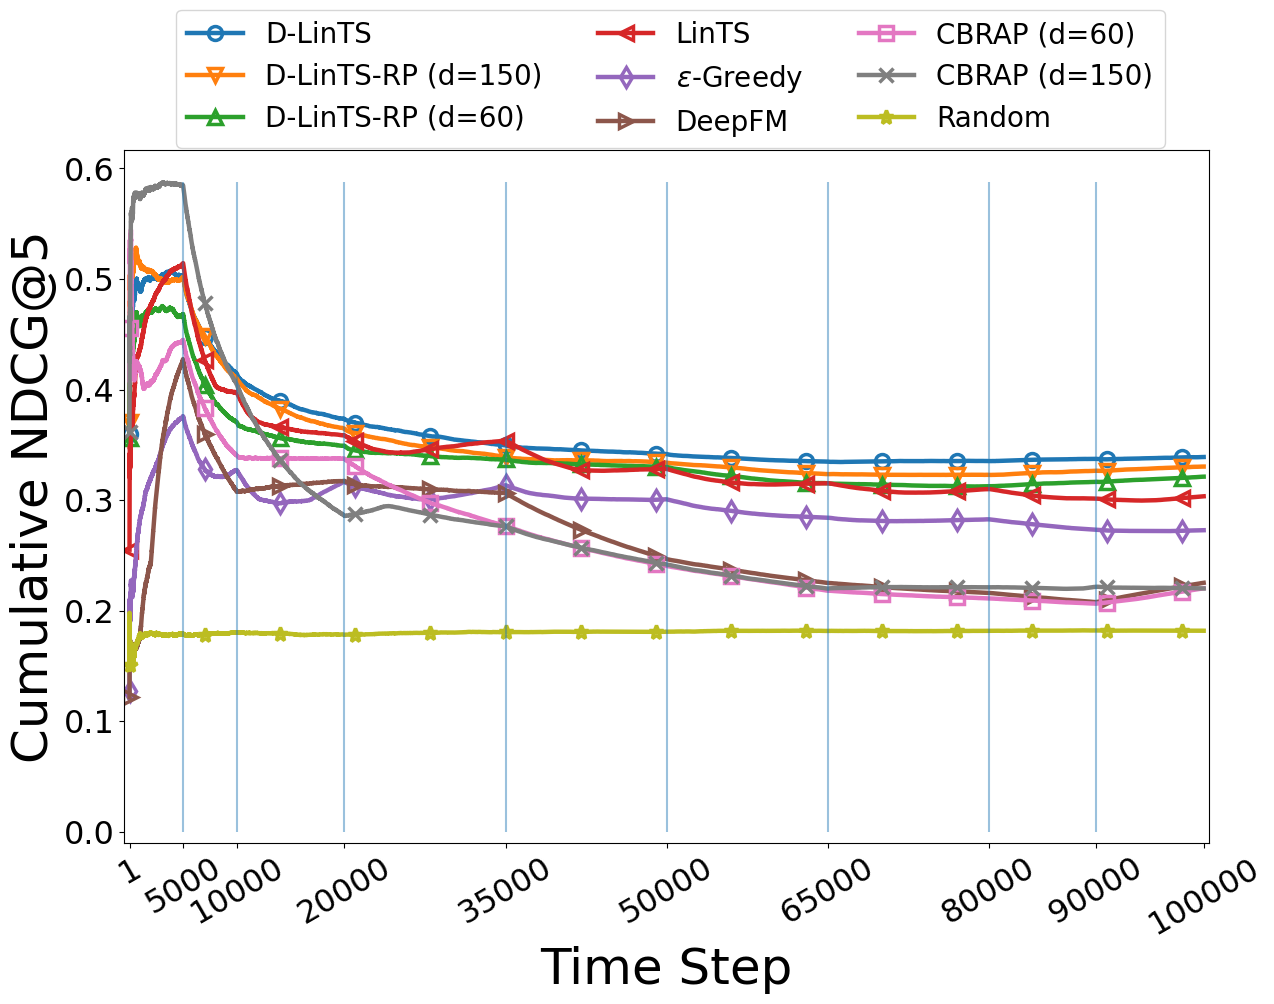

In [28]:
plot_ctrs_or_rewards(ndcg_dict, "NDCG", CHANGE_POINTS);

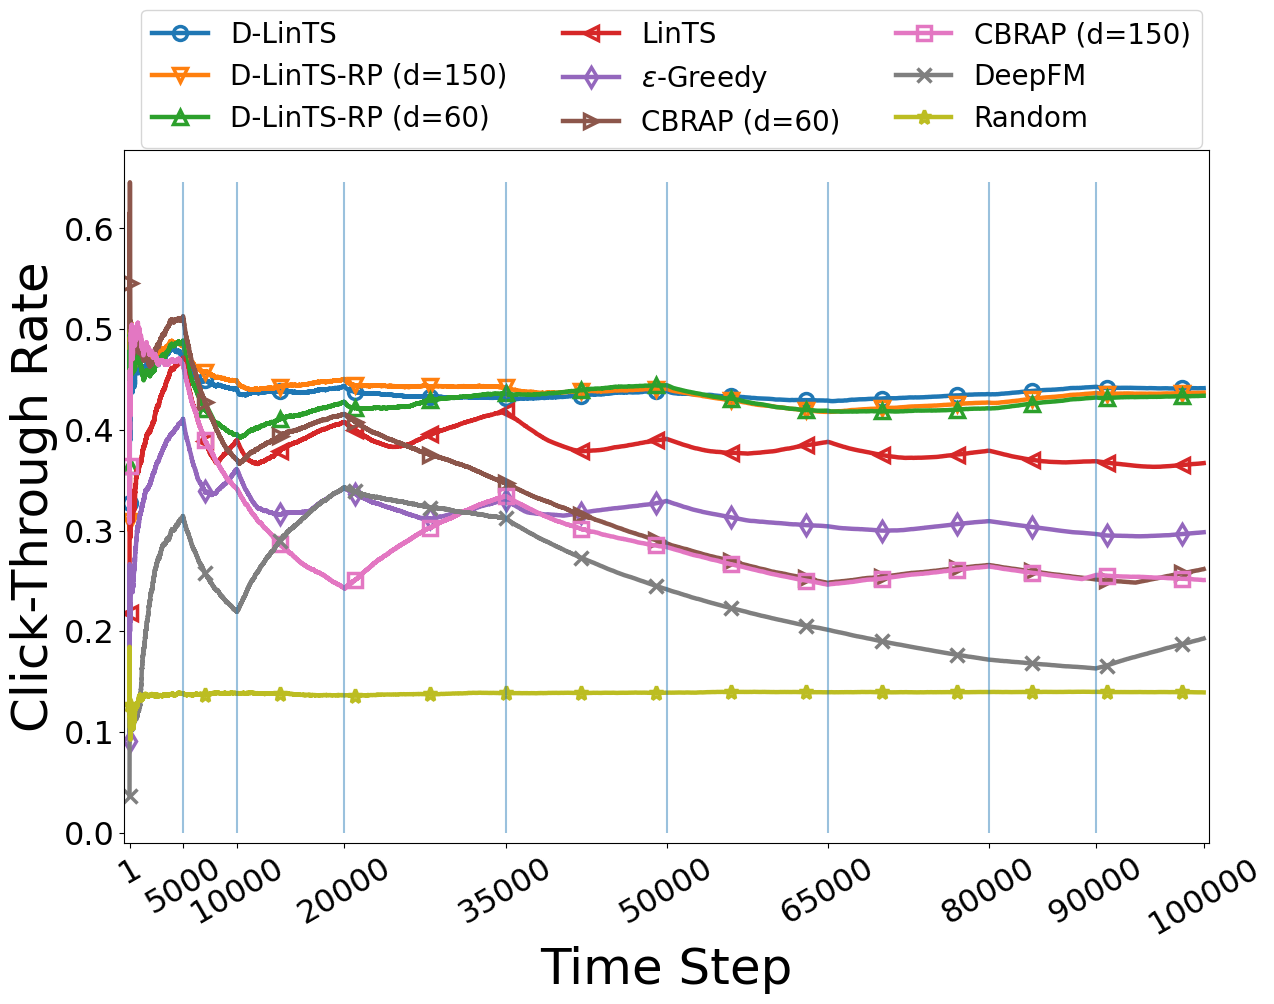

In [29]:
plot_ctrs_or_rewards(reward_dict, "CTR", CHANGE_POINTS);

In [19]:
# plot_ctrs_or_rewards(reward_dict, "Cumulative reward", CHANGE_POINTS);

In [20]:
print('Time')
{k: round(v,1) for k, v in time_dict.items()}

Time


{'CBRAP (d=150, alpha=0.3)': 673.6,
 'D-LinTS-RP (d=150, gamma=0.99, a=0.1)': 1554.3,
 'RandomPolicy': 235.5,
 'LinearTS (nu=0.3)': 2769.7,
 'CBRAP (d=300, alpha=0.3)': 841.0,
 'CBRAP (d=30, alpha=0.3)': 475.8,
 'D-LinTS-RP (d=30, gamma=0.99, a=0.1)': 438.4,
 'E-Greedy (epsilon=0.05)': 223.7,
 'DLinTS (gamma=0.99, a=0.1)': 6800.4,
 'D-LinTS-RP (d=60, gamma=0.99, a=0.1)': 610.6,
 'CBRAP (d=15, alpha=0.3)': 450.9,
 'D-LinTS-RP (d=15, gamma=0.99, a=0.1)': 596.0,
 'LinUCB (alpha=0.3)': 798.8,
 'DeepFM': 3912.7,
 'D-LinTS-RP (d=300, gamma=0.99, a=0.1)': 6362.9,
 'CBRAP (d=60, alpha=0.3)': 521.3}

In [21]:
print('Reward')
[(k,v[-1][0]) for k,v in reward_dict.items()]

Reward


[('$\\epsilon$-Greedy', 29832.4),
 ('DeepFM', 19275.0),
 ('D-LinTS-RP (d=60)', 43382.8),
 ('CBRAP (d=150)', 25081.0),
 ('LinTS', 36695.2),
 ('CBRAP (d=60)', 26171.0),
 ('Random', 13929.0),
 ('D-LinTS', 44134.6),
 ('D-LinTS-RP (d=150)', 43693.2)]

In [22]:
print('NDCG')
[(k, round(v[-1][0],1)) for k,v in ndcg_dict.items()]

NDCG


[('$\\epsilon$-Greedy', 27273.1),
 ('DeepFM', 22513.9),
 ('D-LinTS-RP (d=60)', 32116.6),
 ('CBRAP (d=150)', 22004.3),
 ('LinTS', 30340.7),
 ('CBRAP (d=60)', 22018.0),
 ('Random', 18179.2),
 ('D-LinTS', 33895.4),
 ('D-LinTS-RP (d=150)', 33030.9)]

In [23]:
dims = [15, 30, 60, 150, 300]
times = [596.0, 438.4, 610.6, 1554.3, 6362.9]
rewards = [34681.8, 41278.6, 43382.8, 43693.2, 43747.8]

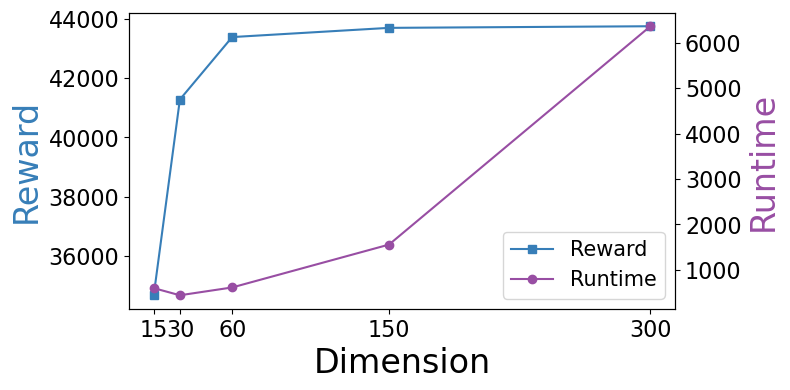

In [24]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

c1 = CB_color_cycle[0]
c2 = CB_color_cycle[5]

fig, ax = plt.subplots(1, figsize=(8, 4))

ax.plot(dims, rewards, color=c1, marker='s', label='Reward')
ax.set_xlabel('Dimension', fontsize=24)
ax.set_ylabel('Reward', color=c1, fontsize=24)




plt.yticks(fontsize=16)
plt.xticks(dims, fontsize=16)

ax2 = ax.twinx()
ax2.plot(dims, times, color=c2, marker='o', label='Runtime')
ax2.set_ylabel('Runtime', color=c2, fontsize=24)


plt.yticks(fontsize=16)
fig.legend(loc='lower right', fontsize=15, bbox_to_anchor=(0.85, 0.215))
plt.tight_layout()
plt.savefig(f'plotting/jester_runtime', dpi=300, facecolor=fig.get_facecolor(), bbox_inches='tight');
plt.show()